# Data augment

0 19


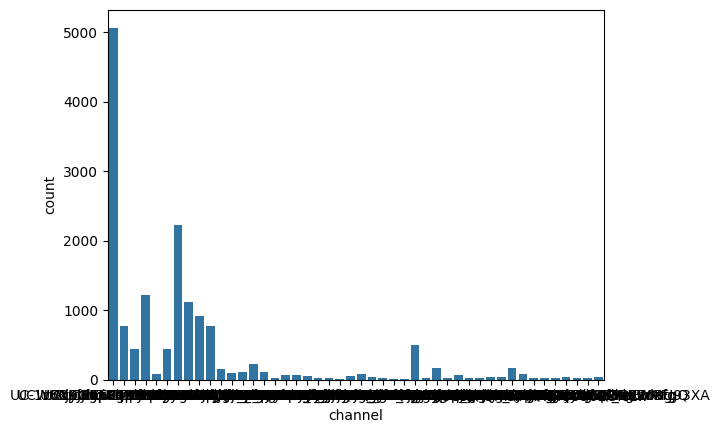

46


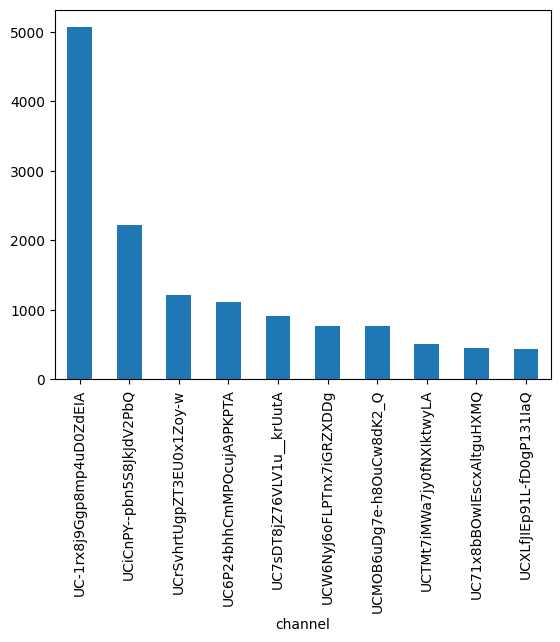

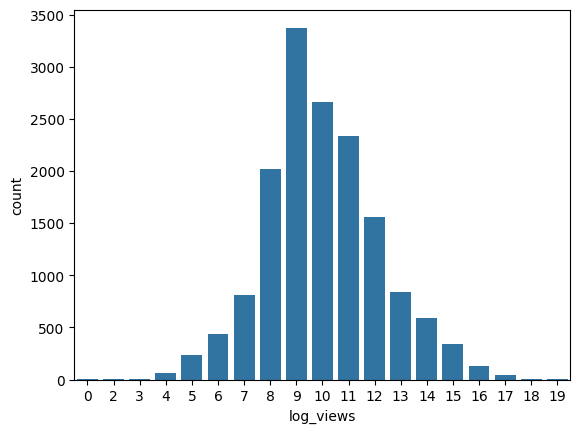

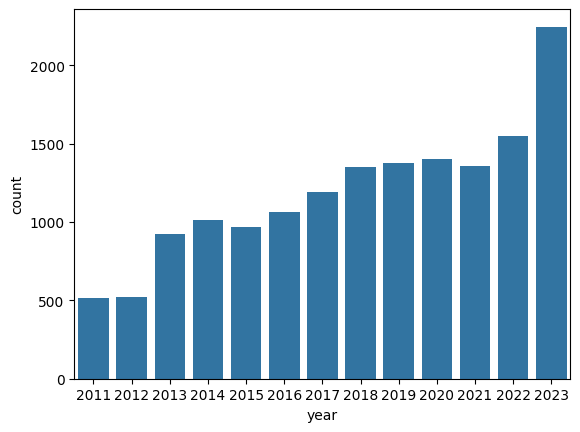

In [2]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

info = pd.read_csv("../dataset/train_val.csv")

# Check required columns
required_columns = ["views", "id", "channel"]
missing = [col for col in required_columns if col not in info.columns]
if missing:
	raise ValueError(f"Missing columns in CSV: {missing}")

# Heavy-tailed?  -> log-transform labels
info["log_views"] = np.int16(np.log1p(info["views"]))
print(np.min(info["log_views"]), np.max(info["log_views"]))
# Category imbalance?

sns.countplot(x="channel", data=info)
plt.show()
top10 = info["channel"].value_counts().head(10)
print(len(info["channel"].unique()))
top10.plot(kind="bar")
plt.show()

sns.countplot(x="log_views", data=info)
plt.show()

sns.countplot(x="year", data=info)
plt.show()



In [8]:
import os
import numpy as np
from PIL import Image
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import fastcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# 1. List all jpg images in the directory
img_dir = "../dataset/train_val_gpt"
img_files = [f for f in os.listdir(img_dir) if f.lower().endswith('.jpg')]

# 2. Load and flatten images (resize for consistency)
features = []
for fname in img_files:
    #img = Image.open(os.path.join(img_dir, fname)).convert('L').resize((64, 64))  # grayscale, 64x64
    img = Image.open(os.path.join(img_dir, fname)).convert('RGB')  # full hd
    features.append(np.array(img,dtype=np.uint8).flatten())
features = np.array(features)


In [26]:
import torch
torch.save(torch.zeros((2,1,3, 224, 224)),'transformed_centroids.pt')

In [2]:
import torch
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

In [ ]:
z=torch.zeros((2,2,3))
b=torch.ones((1,2,3))
d=torch.norm(z-b, dim=1)
d=torch.norm(z-b, dim=1)
print(d.shape,d)

torch.Size([2, 3]) tensor([[1.4142, 1.4142, 1.4142],
        [1.4142, 1.4142, 1.4142]])


In [ ]:

img_dir_test = "../dataset/test"
img_files_test = [f for f in os.listdir(img_dir_test) if f.lower().endswith('.jpg')]

# 2. Load and flatten images (resize for consistency)
features_test = []
for fname in img_files_test:
    #img = Image.open(os.path.join(img_dir, fname)).convert('L').resize((64, 64))  # grayscale, 64x64
    img = Image.open(os.path.join(img_dir_test, fname)).convert('RGB')  # full hd
    features_test.append(np.array(img,dtype=np.uint8).flatten())
features_test = np.array(features_test)

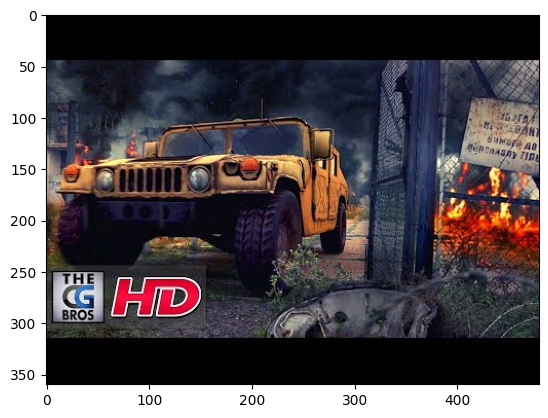

In [26]:
plt.imshow( Image.open(os.path.join(img_dir, img_files[0])).convert('RGB'))

dtype('uint8')

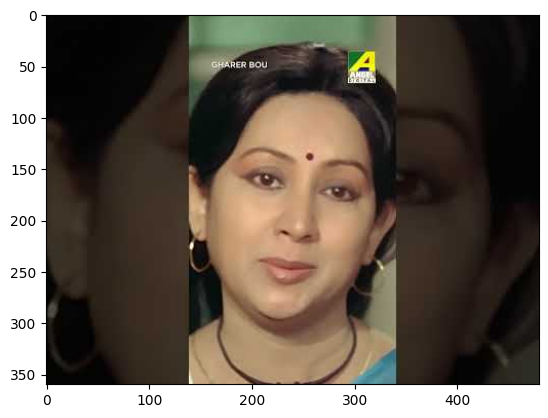

In [66]:
plt.imshow(Image.open(os.path.join(img_dir_test, img_files_test[0])).convert('RGB'))
img = Image.open(os.path.join(img_dir_test, img_files_test[0])).convert('RGB')
img_np = np.array(img)
img_np.shape
img_np.dtype


In [29]:
len(features), len(features_test)

(15482, 15482)

In [31]:
import numpy as np
import fastcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
batch_size = 100  # for example, select 20 random images
num_images = features.shape[0]
random_indices = np.random.choice(num_images, size=batch_size, replace=False)
batch_features = features[random_indices]
batch_img_files = [img_files[i] for i in random_indices]

batch_size_test = 100  # for example, select 20 random images
num_images_test = features_test.shape[0]
random_indices_test= np.random.choice(num_images_test, size=batch_size_test, replace=False)
batch_features_test = features_test[random_indices_test]
batch_img_files_test = [img_files_test[i] for i in random_indices_test]





### ward


finished


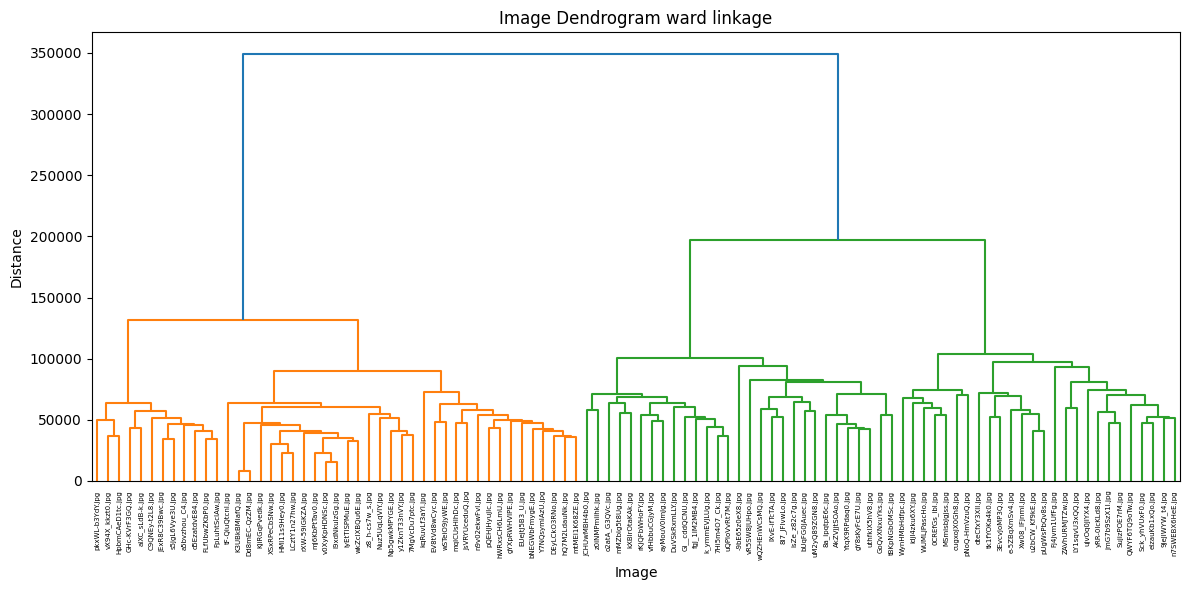

In [35]:

linked = fastcluster.linkage(batch_features, method='ward', metric='euclidean')
print("finished",flush=True)
# 4. Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=batch_img_files, leaf_rotation=90)
plt.title('Image Dendrogram ward linkage')
plt.xlabel('Image')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


finished


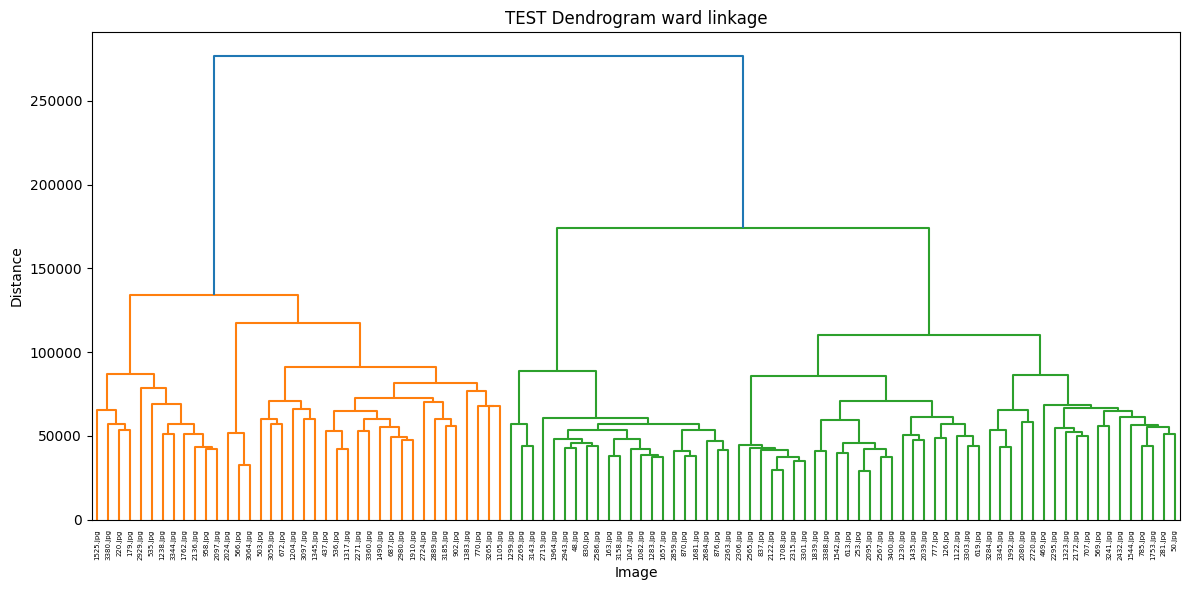

In [36]:

linked_test = fastcluster.linkage(batch_features_test, method='ward', metric='euclidean')
print("finished",flush=True)
# 4. Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked_test, labels=batch_img_files_test, leaf_rotation=90)
plt.title('TEST Dendrogram ward linkage')
plt.xlabel('Image')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

### complete


In [ ]:



# 3. Hierarchical clustering
linked = fastcluster.linkage(batch_features, method='complete', metric='euclidean')

# 4. Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=batch_img_files, leaf_rotation=90)
plt.title('Image Dendrogram complete linkage')
plt.xlabel('Image')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

### everything


In [ ]:
import numpy as np
import fastcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Suppose batch_features and batch_img_files are already defined as in your code

linked = fastcluster.linkage(features, method='ward', metric='euclidean')
print("dendrogram fastcluster",flush=True)

# Sauvegarder
np.save("linked_matrix.npy", linked)

# Recharger plus tard
#linked_loaded = np.load("linked_matrix.npy")

dendrogram fastcluster


In [ ]:
linked_test = fastcluster.linkage(features_test, method='ward', metric='euclidean')
print("dendrogram fastcluster test",flush=True)
# Sauvegarder
np.save("linked_matrix_test.npy", linked_test)
# Recharger plus tard
#linked_loaded_test = np.load("linked_matrix_test.npy")

In [24]:
link_loaded = np.load("linked_matrix.npy")

# ...existing code...
from scipy.cluster.hierarchy import fcluster

# 1. Assign clusters at a given distance threshold
distance_threshold = 250000
clusters = fcluster(link_loaded, t=distance_threshold, criterion='distance')
img_shape = (360, 480, 3)

# 2. Compute centroids for each cluster
centroids = []
for cluster_id in np.unique(clusters):
    members = features[clusters == cluster_id]
    
    centroid = members.mean(axis=0)
    
    centroids.append(centroid.reshape(img_shape))
    centroid_uint8 = np.clip(centroids[-1], 0, 255).astype(np.uint8)
    img=Image.fromarray(centroid_uint8)
    img.save(f"centroids/centroid_{cluster_id}.jpg")
centroids = np.array(centroids)
# centroids[i] is the centroid of cluster i+1 (since cluster labels start at 1)
# ...existing code...
# Save centroids as a numpy file
np.save("centroids.npy", centroids)

# To load them later:
# loaded_centroids = np.load("centroids.npy")

#test_centroids = np.load("centroids.npy")

In [ ]:
from PIL import Image
import numpy as np

# Suppose arr is your numpy array of shape (H, W, 3) and dtype uint8
arr = np.random.randint(0, 256, (224, 224, 3), dtype=np.uint8)
img = Image.fromarray(arr)
img.save("output.png")

In [ ]:
centroid=Image.open(os.join"centroids/centroid_1.jpg")
centroid.show()

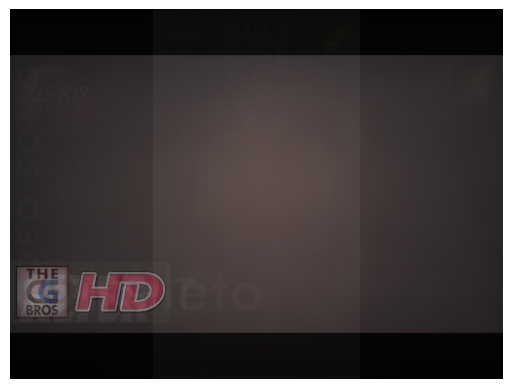

In [18]:
import numpy as np
import matplotlib.pyplot as plt
img_shape = (360, 480, 3)
centroids=np.load("centroids.npy")
image = centroids[0]
plt.imshow(image.astype(np.uint8))
plt.axis('off')
plt.show()

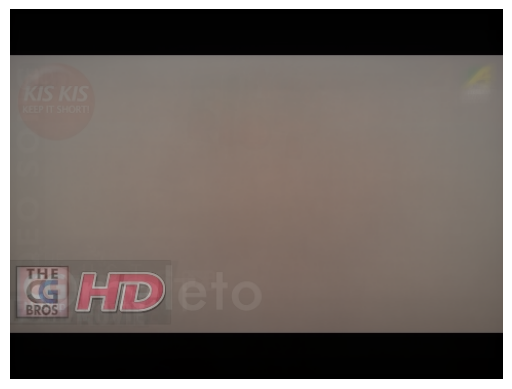

In [19]:
img_shape = (360, 480, 3)
image = centroids[1]
plt.imshow(image.astype(np.uint8))
plt.axis('off')
plt.show()

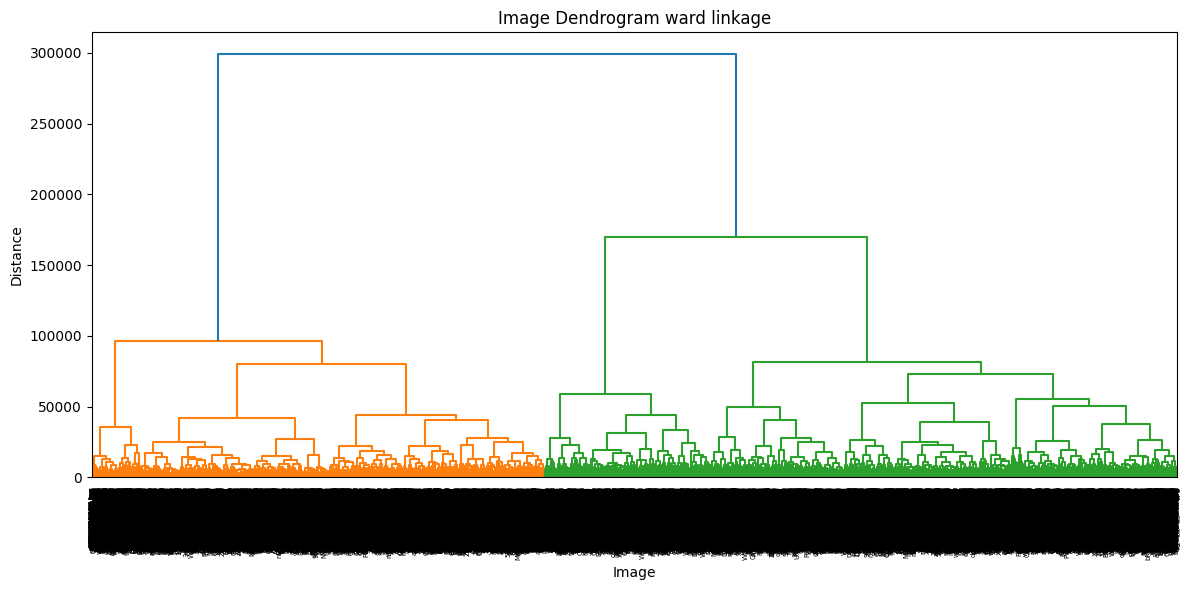

In [8]:
linked_loaded = np.load("linked_matrix.npy", allow_pickle=True)
plt.figure(figsize=(12, 6))
dendrogram(linked_loaded, labels=img_files, leaf_rotation=90)
plt.title('Image Dendrogram ward linkage')
plt.xlabel('Image')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


Les vecteurs sont séparés en deux grandes catégories pour ward (deux boules bien distantes),
Ils sont separé en trois pour complete linkage,

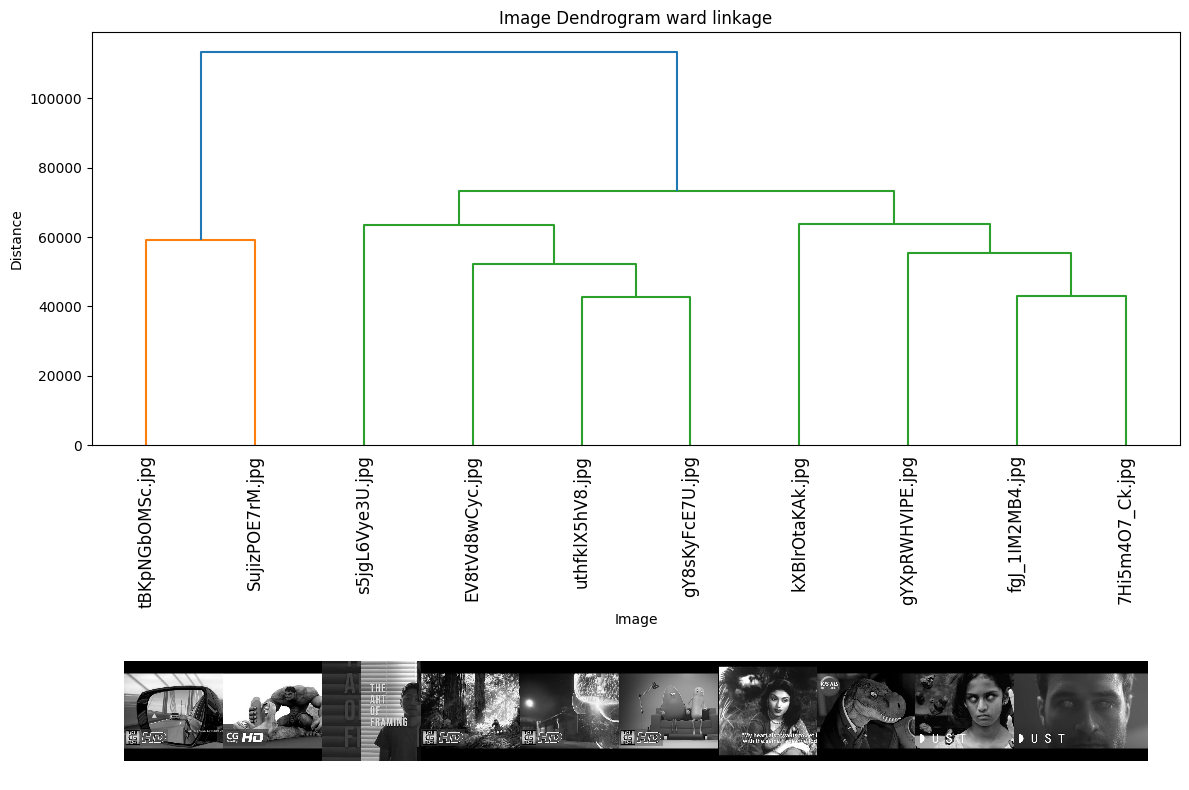

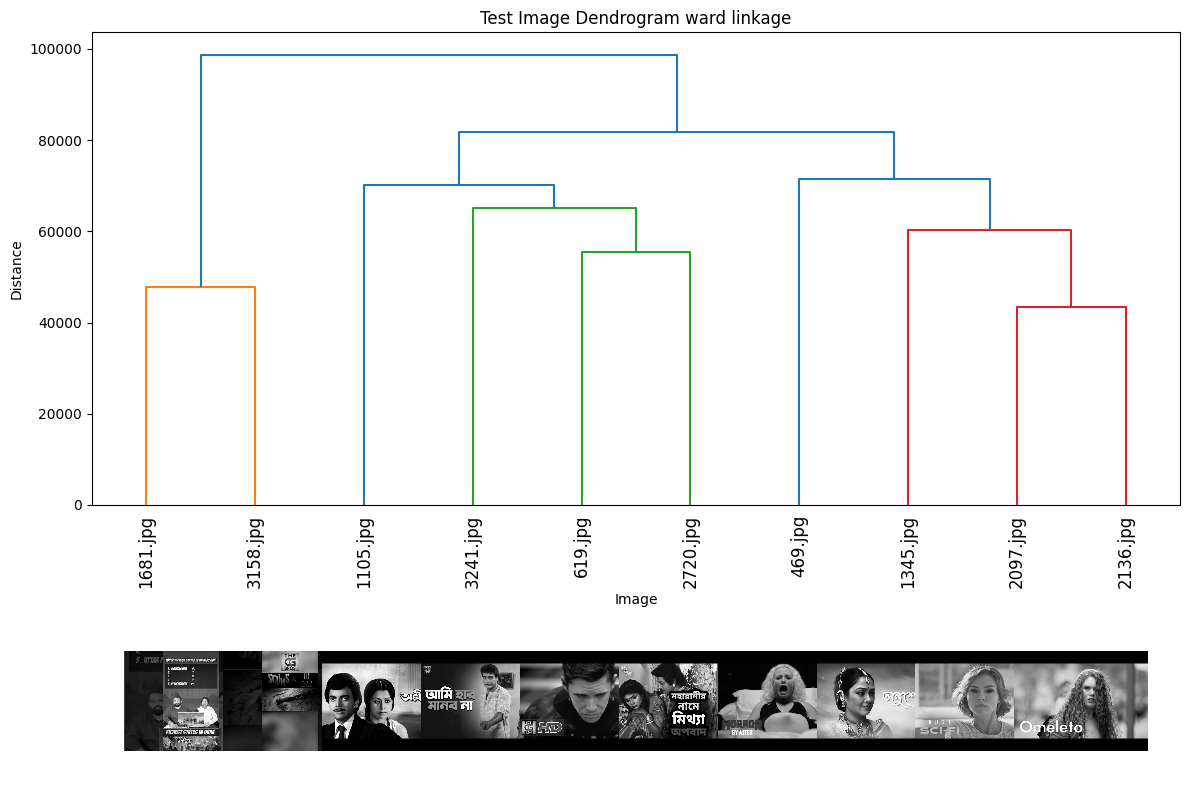

In [38]:
from matplotlib import gridspec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

mini_batch=10
rand_ind2=np.random.choice(batch_size, size=mini_batch, replace=False)
mini_batch_img= [batch_img_files[i] for i in rand_ind2]
mini_features= batch_features[rand_ind2]
# Compute linkage
mini_linked = linkage(mini_features, method='ward')

# Create figure with space for images below
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Dendrogram
ax1 = plt.subplot(gs[0])
ddata = dendrogram(mini_linked, labels=mini_batch_img, leaf_rotation=90, ax=ax1)
ax1.set_title('Image Dendrogram ward linkage')
ax1.set_xlabel('Image')
ax1.set_ylabel('Distance')

# Images below dendrogram
ax2 = plt.subplot(gs[1])
ax2.axis('off')
x_labels = ddata['ivl']  # order of labels as shown by dendrogram

for i, label in enumerate(x_labels):
    img_path = os.path.join(img_dir, label)
    img = Image.open(img_path).convert('L')
    imagebox = OffsetImage(img, zoom=0.2, cmap='gray')  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, 0), frameon=False)
    ax2.add_artist(ab)

ax2.set_xlim(-1, len(x_labels))
ax2.set_ylim(-1, 1)
plt.tight_layout()
plt.show()


# For test images
mini_batch_test = 10
rand_ind2_test = np.random.choice(batch_size_test, size=mini_batch_test, replace=False)
mini_batch_img_test = [batch_img_files_test[i] for i in rand_ind2_test]
mini_features_test = batch_features_test[rand_ind2_test]

# Compute linkage
mini_linked_test = linkage(mini_features_test, method='ward')

# Create figure with space for images below
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Dendrogram
ax1 = plt.subplot(gs[0])
ddata = dendrogram(mini_linked_test, labels=mini_batch_img_test, leaf_rotation=90, ax=ax1)
ax1.set_title('Test Image Dendrogram ward linkage')
ax1.set_xlabel('Image')
ax1.set_ylabel('Distance')

# Images below dendrogram
ax2 = plt.subplot(gs[1])
ax2.axis('off')
x_labels = ddata['ivl']  # order of labels as shown by dendrogram

for i, label in enumerate(x_labels):
    img_path = os.path.join(img_dir_test, label)
    img = Image.open(img_path).convert('L')
    imagebox = OffsetImage(img, zoom=0.2, cmap='gray')  # Adjust zoom as needed
    ab = AnnotationBbox(imagebox, (i, 0), frameon=False)
    ax2.add_artist(ab)

ax2.set_xlim(-1, len(x_labels))
ax2.set_ylim(-1, 1)
plt.tight_layout()
plt.show()


C'est peut-être gens/pas gens: les clusters sont un eu les mêmes entre complete et ward

In [27]:
from scipy.cluster.hierarchy import fcluster

# linked: the linkage matrix from linkage()
# t: the distance threshold you want (e.g., t=50)
# criterion='distance' means clusters are formed when the linkage distance is <= t
clusters = fcluster(linked, t=60000, criterion='distance')

# clusters is an array of cluster labels (same order as your input data)
